In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator


In [2]:
!pip install tensorflow.gpu

     |████████████████████████████████| 454.3MB 36kB/s 


In [3]:
!nvidia-smi

Wed Jun  9 04:30:19 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

**Preprocessing the Training set**



In [4]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
training_set = train_datagen.flow_from_directory(
        '/content/drive/My Drive/dataset/training_set',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

Found 8000 images belonging to 2 classes.


Preprocessing the Test set

In [5]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
        '/content/drive/MyDrive/dataset/test_set',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

Found 2001 images belonging to 2 classes.


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [7]:
#we have already resized our shape to 64x64 
128*128*3

49152

In [8]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(64,64,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))


model.add(Dense(1,activation='sigmoid'))


model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [9]:
from tensorflow.keras.callbacks import EarlyStopping

In [10]:
early_stopping = EarlyStopping(monitor='val_loss',patience=2)

In [11]:
model.fit(training_set,epochs=30,validation_data=(test_set),callbacks=[early_stopping])

Epoch 1/30
250/250 [==============================] - 1865s 7s/step - loss: 0.6506 - accuracy: 0.6058 - val_loss: 0.6179 - val_accuracy: 0.6392
Epoch 2/30
250/250 [==============================] - 38s 151ms/step - loss: 0.5883 - accuracy: 0.6861 - val_loss: 0.5650 - val_accuracy: 0.7136
Epoch 3/30
250/250 [==============================] - 38s 151ms/step - loss: 0.5526 - accuracy: 0.7146 - val_loss: 0.5332 - val_accuracy: 0.7431
Epoch 4/30
250/250 [==============================] - 37s 149ms/step - loss: 0.5179 - accuracy: 0.7437 - val_loss: 0.4948 - val_accuracy: 0.7686
Epoch 5/30
250/250 [==============================] - 37s 149ms/step - loss: 0.4899 - accuracy: 0.7664 - val_loss: 0.4793 - val_accuracy: 0.7706
Epoch 6/30
250/250 [==============================] - 37s 149ms/step - loss: 0.4780 - accuracy: 0.7701 - val_loss: 0.4564 - val_accuracy: 0.7821
Epoch 7/30
250/250 [==============================] - 37s 149ms/step - loss: 0.4472 - accuracy: 0.7869 - val_loss: 0.5202 - val_acc

In [12]:
import pandas as pd

In [13]:
metrics = pd.DataFrame(model.history.history)


In [14]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.650626,0.605750,0.617912,0.639180
1,0.588251,0.686125,0.564975,0.713643
2,0.552597,0.714625,0.533242,0.743128
3,0.517906,0.743750,0.494785,0.768616
4,0.489928,0.766375,0.479347,0.770615
5,0.477996,0.770125,0.456391,0.782109
6,0.447237,0.786875,0.520165,0.758621
7,0.442956,0.788750,0.462521,0.789105


In [19]:
metrics.columns

Index(['loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')

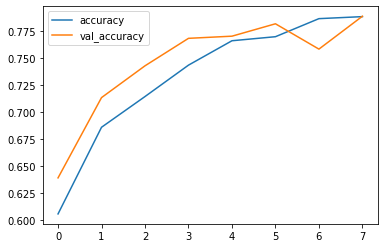

In [20]:
metrics[['accuracy', 'val_accuracy']].plot()

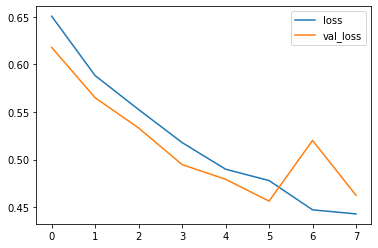

In [21]:
metrics[['loss', 'val_loss']].plot()

In [22]:
model.evaluate(training_set,verbose=0)

[0.41657841205596924, 0.8109999895095825]

Making a single prediction

In [23]:
import numpy as np
from keras.preprocessing import image

test_image = image.load_img('/content/drive/MyDrive/dataset/single_prediction/cat_or_dog_1.jpg', target_size=(64,64) )
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

result = model.predict(test_image)

training_set.class_indices
if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'
 
   

In [24]:
print(prediction)

dog


Here we can see that our model successfully predicted the result as dog

---



Make another prediction

In [25]:
test_image = image.load_img('/content/drive/MyDrive/dataset/single_prediction/cat_or_dog_2.jpg', target_size=(64,64) )
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

result = model.predict(test_image)

training_set.class_indices
if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'


In [26]:
print(prediction)

cat


Here we can see that our model successfully predicted the result as cat


**Making predictions by taking random image from test data and predicting the result.**

In [27]:
test_image = image.load_img('/content/drive/MyDrive/dataset/single_prediction/cat.4533.jpg', target_size=(64,64) )
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

result = model.predict(test_image)

training_set.class_indices
if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'


In [29]:
print(prediction)

cat


We can see that our was able to predict the correct resut

In [32]:
test_image2 = image.load_img('/content/drive/MyDrive/dataset/single_prediction/cat.4326.jpg', target_size=(64,64) )
test_image2 = image.img_to_array(test_image2)
test_image2 = np.expand_dims(test_image2, axis=0)

result = model.predict(test_image2)

training_set.class_indices
if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'


In [33]:
print(prediction)

cat


In [34]:
test_image3 = image.load_img('/content/drive/MyDrive/dataset/single_prediction/dog.4067.jpg', target_size=(64,64) )
test_image3 = image.img_to_array(test_image3)
test_image3 = np.expand_dims(test_image3, axis=0)

result = model.predict(test_image3)

training_set.class_indices
if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'


In [35]:
print(prediction)

dog


We can see that our model is predicting the correct results on random image predictions